# Vorlesung 4: Korrelationen

### Setup

In [1]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import statsmodels.api as sm
from scipy import stats
import numpy as np
import missingno as msno

# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Download latest version

path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")

print(f"Anzahl Zeilen: {ds.shape[0]}")
print(f"Anzahl Spalten: {ds.shape[1]}")

/Users/karlaruggaber/.pyenv/versions/3.10.6/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Anzahl Zeilen: 1296675
Anzahl Spalten: 24


### Mögliche Korrelation zwischen Alter und Transaktionsbetrag
Man könnte davon ausgehen, dass Leute in eher jüngeren Jahren mehr Geld ausgeben, z.b. für Freizeit/Ferien/etc. Auch könnte man argumentieren, dass Personen im mittleren Alter durchschnittlich mehr ausgeben, da sie sich um eine Familie kümmern.

Korrelation Alter ↔ Betrag:
 Pearson : -0.0097
 Spearman: -0.0235
 Kendall : -0.0156


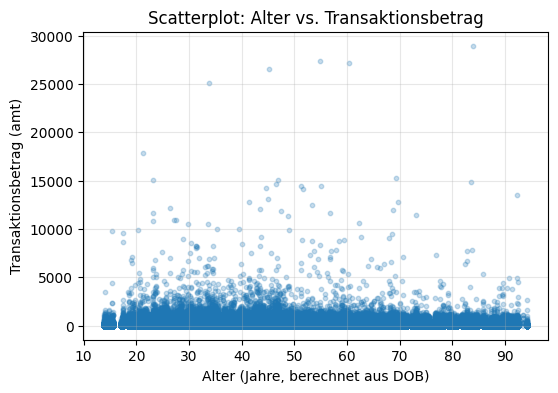

In [2]:
# Alter berechnen
ds["dob"] = pd.to_datetime(ds["dob"], errors="coerce")
age = (pd.Timestamp("2019-01-01") - ds["dob"]).dt.days / 365.25

# Korrelationen berechnen
pearson_corr  = age.corr(ds["amt"], method="pearson")
spearman_corr = age.corr(ds["amt"], method="spearman")
kendall_corr  = age.corr(ds["amt"], method="kendall")

print("Korrelation Alter ↔ Betrag:")
print(f" Pearson : {pearson_corr: .4f}")
print(f" Spearman: {spearman_corr: .4f}")
print(f" Kendall : {kendall_corr: .4f}")

# Scatterplot
plt.figure(figsize=(6,4))
plt.scatter(age, ds["amt"], alpha=0.25, s=10)
plt.title("Scatterplot: Alter vs. Transaktionsbetrag")
plt.xlabel("Alter (Jahre, berechnet aus DOB)")
plt.ylabel("Transaktionsbetrag (amt)")
plt.grid(True, alpha=0.3)
plt.show()

Um mit dem Alter arbeiten zu können, konvertieren wir die Spalte *dob* (date of birth) und berechnen daraus das Alter der jeweiligen Person.

Wir berechnen dazu alle drei relevanten Angaben zur Korrelation: pearson, spearman und kendall.

**Erkenntnis**: Der Zusammenhang zwischen Alter und Transaktionsbetrag ist praktisch null. Dass erkennt man zum einen daran, dass alle drei relevanten Angaben zur Korrelation sehr nahe bei 0 liegen. Auch wenn man den Scatterplot betrachtet, kann man kein zusammenhängendes Muster erkennen. Daher korrelieren diese beiden Variablen nicht miteinander.

### Mögliche Korrelation zwischen der Stadtgrösse und dem Transaktionsbetrag
Eine mögliche Annahme könnte sein, dass in grösseren Städten der durchschnittliche Transaktionsbetrag höher ist, da die Lebenskosten dort grösser sind.

Korrelation Stadtgröße (city_pop) ↔ Betrag (amt)
 Pearson :  0.0058
 Spearman: -0.0236
 Kendall : -0.0157


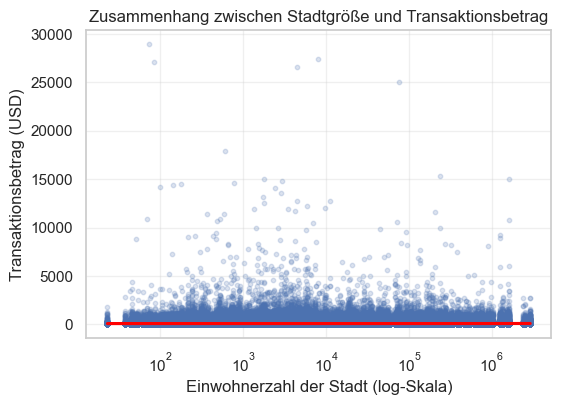

In [9]:
# Korrelationen berechne
pearson  = ds["city_pop"].corr(ds["amt"], method="pearson")
spearman = ds["city_pop"].corr(ds["amt"], method="spearman")
kendall  = ds["city_pop"].corr(ds["amt"], method="kendall")

print("Korrelation Stadtgröße (city_pop) ↔ Betrag (amt)")
print(f" Pearson : {pearson: .4f}")
print(f" Spearman: {spearman: .4f}")
print(f" Kendall : {kendall: .4f}")

# Scatterplot mit Regressionslinie
plt.figure(figsize=(6,4))
sns.regplot(
    x="city_pop", 
    y="amt", 
    data=ds, 
    scatter_kws={"alpha":0.2, "s":10}, 
    line_kws={"color":"red"}
)
plt.xscale("log")   # log-Skala, da city_pop stark variiert (kleine & große Städte)
plt.title("Zusammenhang zwischen Stadtgröße und Transaktionsbetrag")
plt.xlabel("Einwohnerzahl der Stadt (log-Skala)")
plt.ylabel("Transaktionsbetrag (USD)")
plt.grid(True, alpha=0.3)
plt.show()

Auch hier berechnen wir wieder alle drei auskunftgebenden Zahlen, um zu erkennen, ob eine Korrelation vorliegt. Auch hier liegen die Werte wieder sehr nahe bei Null, woran wir erkennen können, dass praktisch keine Korrelation vorhanden ist. Auch die eingezeichnete Regressionslinie im Scatterplot zeigt dies sehr deutlich. 

Die Population der jeweiligen Stadt wird auf eine Log-Skala gesetzt, da die Einwohnerzahl stark variiert. Somit werden sowohl kleine als auch grosse Städte gleichzeitig sinnvoll sichtbar.

### Mögliche Korrelation zwischen der Transaktionszeit und dem Transaktionsbetrag
Man könnte argumentieren, dass grosse Transaktionsbeträge eher am Abend vorkommen, da viele am Abend Online-Shopping betreiben.

Korrelation Betrag (amt) ↔ Zeit (unix_time)
 Pearson : -0.0003
 Spearman:  0.0006
 Kendall :  0.0004


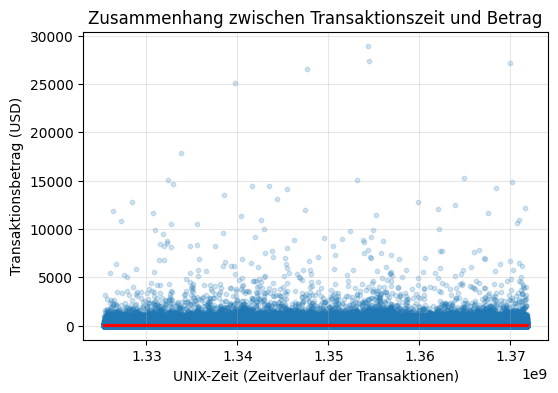

In [4]:
# Korrelationen berechnen
pearson  = ds["amt"].corr(ds["unix_time"], method="pearson")
spearman = ds["amt"].corr(ds["unix_time"], method="spearman")
kendall  = ds["amt"].corr(ds["unix_time"], method="kendall")

print("Korrelation Betrag (amt) ↔ Zeit (unix_time)")
print(f" Pearson : {pearson: .4f}")
print(f" Spearman: {spearman: .4f}")
print(f" Kendall : {kendall: .4f}")

# Scatterplot mit Regressionslinie
plt.figure(figsize=(6,4))
sns.regplot(
    x="unix_time", 
    y="amt", 
    data=ds, 
    scatter_kws={"alpha":0.2, "s":10},
    line_kws={"color":"red"}
)
plt.title("Zusammenhang zwischen Transaktionszeit und Betrag")
plt.xlabel("UNIX-Zeit (Zeitverlauf der Transaktionen)")
plt.ylabel("Transaktionsbetrag (USD)")
plt.grid(True, alpha=0.3)
plt.show()

Dasselbe auch wieder hier: alle drei Angaben (pearson/spearman/kendall) liegen sehr nahe bei Null und weisen somit nicht auf eine Korrelation hin. Dasselbe zeigt und auch die Regressionslinie im Scatterplot. 

**Erklärung zur x-Achse**: Die x-Achste ist mit UNIX-Zeit beschriftet. Das entspricht übersetzt etwa folgendem:
- 1.33 $\rightarrow$ Anfang 2012
- 1.35 $\rightarrow$ Mitte 2012
- 1.37 $\rightarrow$ Ende 2013
Wir sehen also die Transaktionen über etwa 2 Jahre hinweg

Der folgende Code wählt alle numerischen Spalten des Datensatzes aus und erstellt eine Scatterplot-Matrix, in der jede numerische Variable gegen jede andere geplottet wird. Auf der Diagonale werden die Verteilungen der einzelnen Variablen (als Dichtekurven) gezeigt, um Zusammenhänge, Muster und Ausreißer visuell zu erkennen.

Dies geht jedoch extrem lange. Daher kann dieser Eintrag bei Bedarf auch unausgeführt gelassen werden.

In [6]:
numeric_ds = ds.select_dtypes(include='number')

# Scatterplot matrix
pd.plotting.scatter_matrix(numeric_ds, alpha=0.8, figsize=(12, 12), diagonal='kde')
plt.show()

KeyboardInterrupt: 

### Scatterplot-Matrix
Der folgende Code erstellt eine angepasste Scatterplot-Matrix nur für ausgewählte numerische Variablen: unterhalb der Diagonale werden Scatterplots, auf der Diagonale die Verteilungen (KDE) und oberhalb der Diagonale die Korrelationskoeffizienten zwischen jeweils zwei Variablen angezeigt. Dadurch erhält man in einer einzigen Grafik sowohl eine visuelle Einschätzung der Datenverteilungen als auch eine quantitative Aussage über lineare Zusammenhänge.

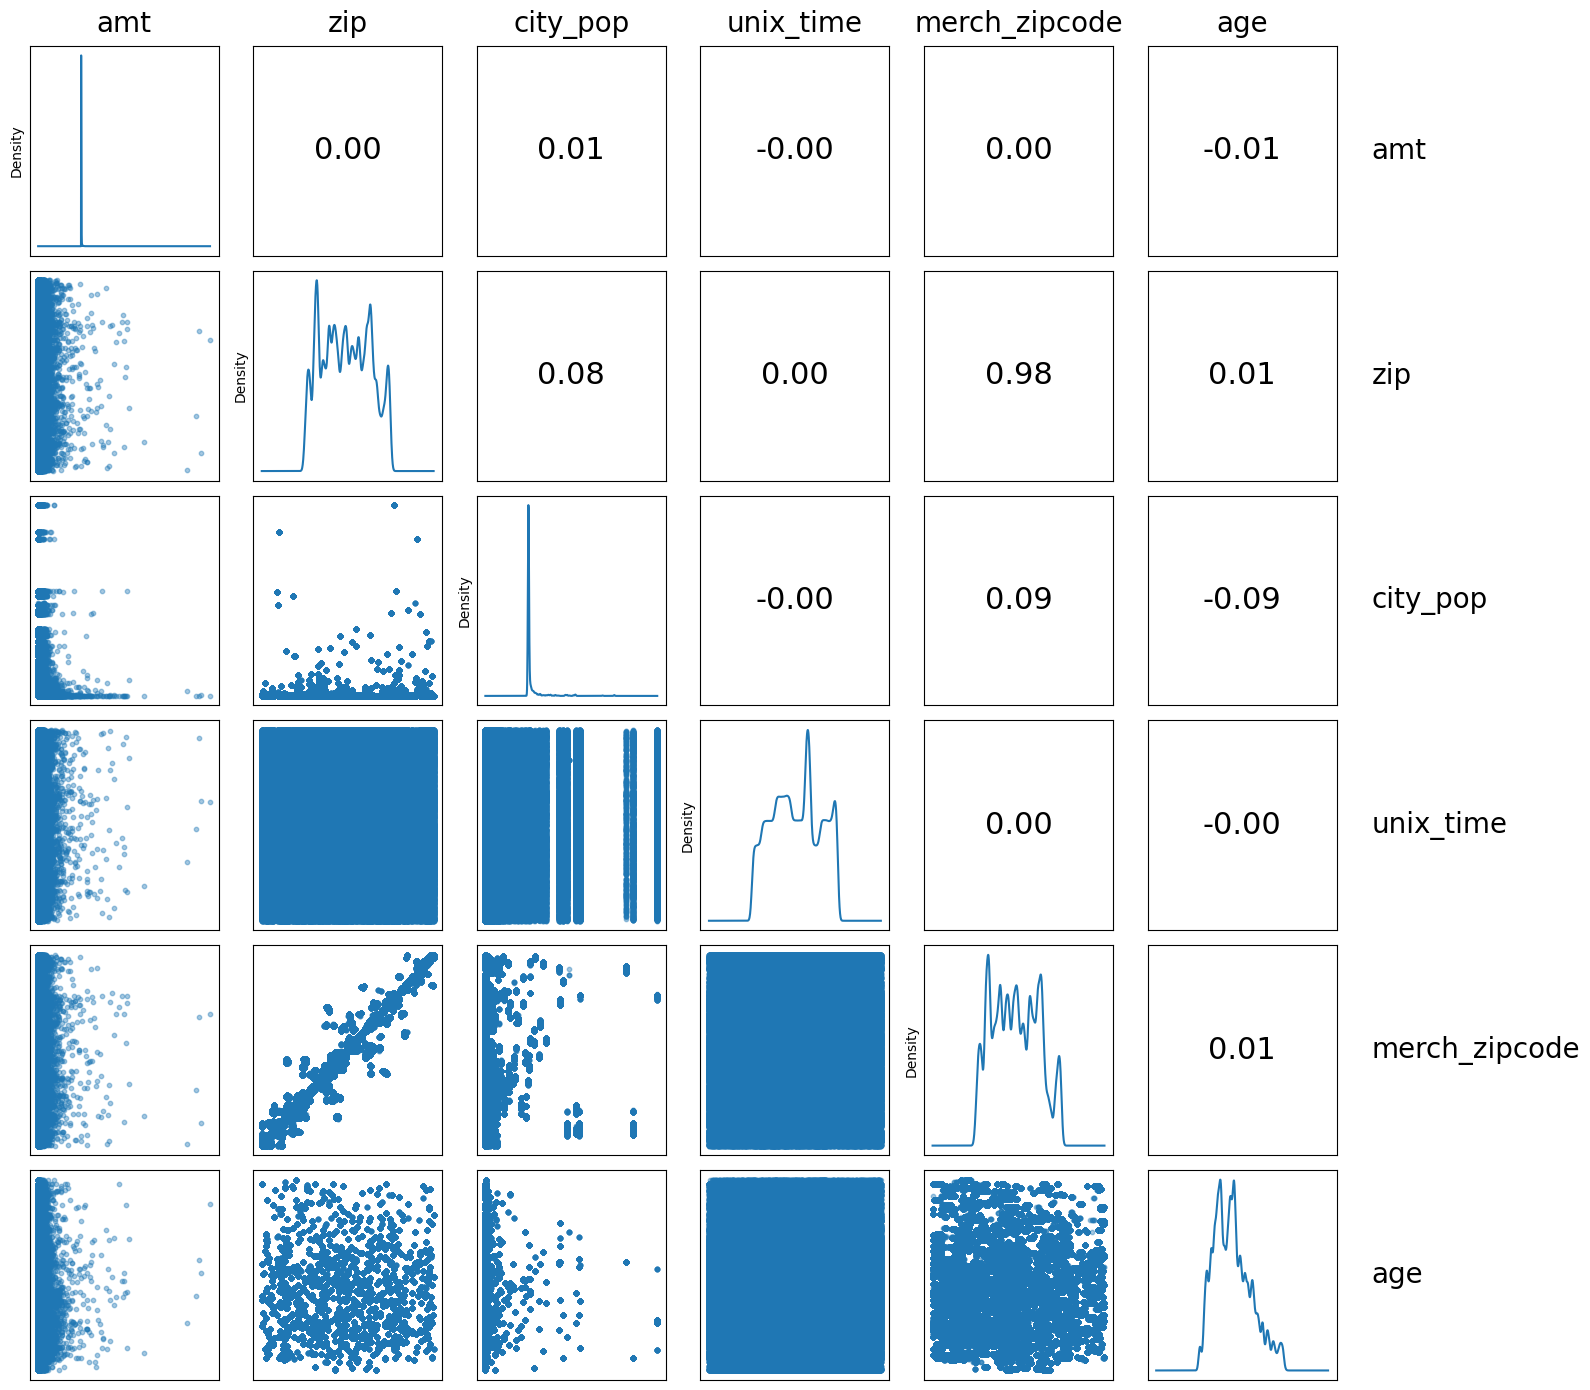

In [7]:
numeric_ds = ds.select_dtypes(include='number')

numeric_ds.drop(columns=["Unnamed: 0","cc_num","lat","long","merch_lat","merch_long","is_fraud"], inplace=True)

num_cols = numeric_ds.select_dtypes(include='number').columns
n = len(num_cols)

fig, axes = plt.subplots(n, n, figsize=(16, 14))

for i, col1 in enumerate(num_cols):
    for j, col2 in enumerate(num_cols):
        ax = axes[i, j]
        
        # Untere Dreiecksmatrix: Scatterplots
        if i > j:
            ax.scatter(numeric_ds[col2], numeric_ds[col1], alpha=0.4, s=10)
        
        # Obere Dreiecksmatrix: Korrelationswerte
        elif i < j:
            corr = numeric_ds[col1].corr(numeric_ds[col2])
            ax.text(0.5, 0.5, f'{corr:.2f}', ha='center', va='center', fontsize=22)
        
        # Diagonale: KDE-Dichtekurve mit Pandas
        else:
            numeric_ds[col1].plot(kind='kde', ax=ax, lw=1.5)
        
        # Achsen ausblenden für Übersicht
        ax.set_xticks([])
        ax.set_yticks([])

        # Nur äußere Beschriftungen beibehalten
        if i < n - 1:
            ax.set_xticklabels([])
        if j > 0:
            ax.set_yticklabels([])

# Spaltennamen oben
for j, col in enumerate(num_cols):
    axes[0, j].set_title(col, fontsize=20, pad=10)

# Zeilennamen rechts
for i, col in enumerate(num_cols):
    axes[i, -1].yaxis.set_label_position("right")
    axes[i, -1].set_ylabel(col, rotation=0, labelpad=25, fontsize=20, horizontalalignment='left',va='center')

plt.tight_layout()
plt.show()

Wie man erkennen kann, ist eine einzelne Korrelation zwischen *zip* und *merch_zipcode* erkennbar. Dies ist sehr logisch und zu erwarten, da alle offline-Käufe (also Käufe vor Ort) natürlich sowohl im Händler als auch im Käufer die gleiche Postleitzahl haben.

Wir sehen also, dass es bis auf diese eine logische Korrelation keine Korrelation in unserem Datensatz gibt.

### Verteilung der Transaktionen nach Kategorie und Geschlecht
Der Code analysiert die Verteilung der Transaktionen nach Kategorie und Geschlecht, indem er zuerst prozentuale Anteile pro Kategorie, dann den Gesamtanteil nach Geschlecht und schließlich die absoluten Transaktionszahlen darstellt. So kann man vergleichen, ob sich Geschlechterunterschiede je nach Kategorie unterscheiden oder ob sie lediglich durch die Gesamtverteilung erklärbar sind.

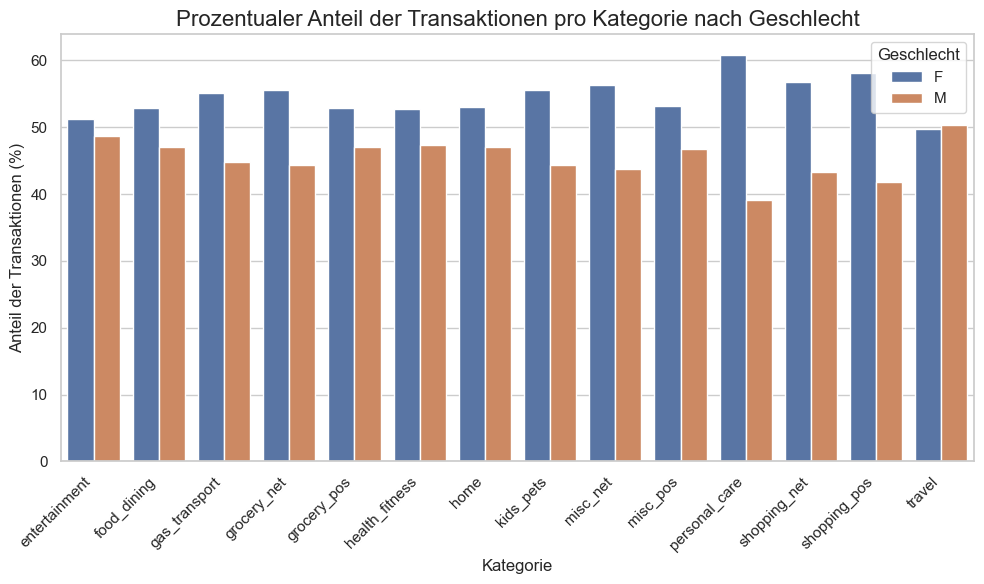

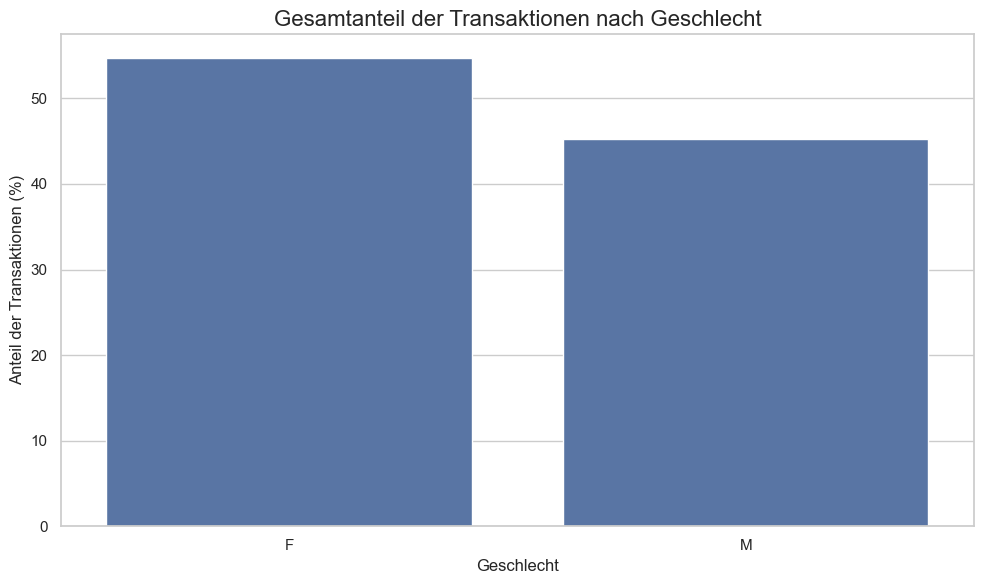

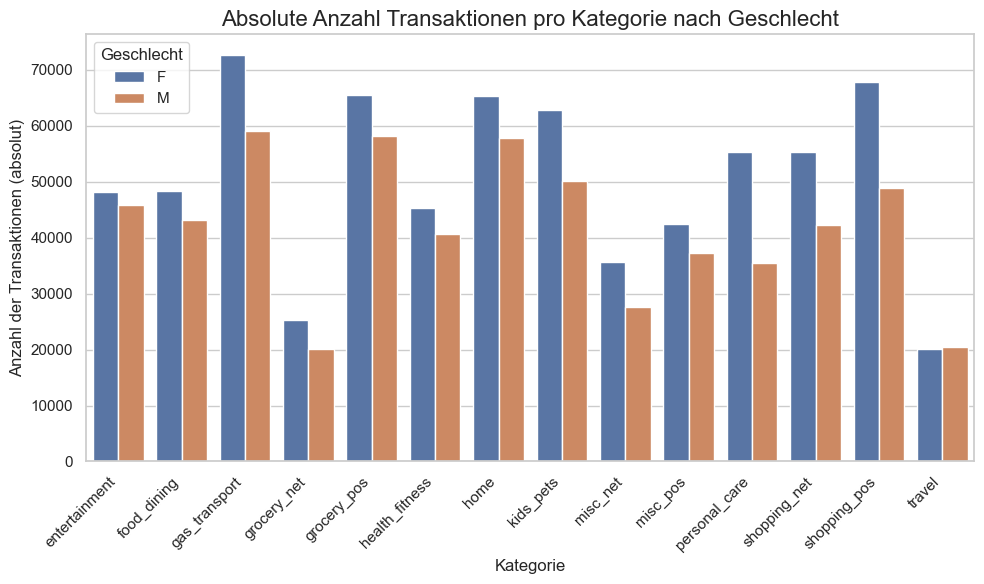

In [8]:
sns.set(style="whitegrid")

# Gruppieren nach Kategorie und Geschlecht und Anzahl zählen
category_gender_counts = ds.groupby(['category', 'gender']).size().reset_index(name='count')

# Prozentanteile pro Kategorie berechnen
category_totals = category_gender_counts.groupby('category')['count'].transform('sum')
category_gender_counts['percent'] = category_gender_counts['count'] / category_totals * 100

# Balkendiagramm mit Prozentwerten erstellen
plt.figure()
sns.barplot(x='category', y='percent', hue='gender', data=category_gender_counts)

# Diagramm anpassen
plt.title("Prozentualer Anteil der Transaktionen pro Kategorie nach Geschlecht", fontsize=16)
plt.xlabel("Kategorie", fontsize=12)
plt.ylabel("Anteil der Transaktionen (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Geschlecht')
plt.tight_layout()

# Gesamtprozentwerte nach Geschlecht berechnen
gender_counts = ds.groupby("gender").size().reset_index(name="count")
gender_counts['percent'] = gender_counts['count'] / gender_counts['count'].sum() * 100

# Gesamtvergleich als Prozentwerte
plt.figure()
sns.barplot(x='gender', y='percent', data=gender_counts)
plt.title("Gesamtanteil der Transaktionen nach Geschlecht", fontsize=16)
plt.xlabel("Geschlecht", fontsize=12)
plt.ylabel("Anteil der Transaktionen (%)", fontsize=12)
plt.tight_layout()

plt.figure()
sns.barplot(x='category', y='count', hue='gender', data=category_gender_counts)

# Diagramm anpassen
plt.title("Absolute Anzahl Transaktionen pro Kategorie nach Geschlecht", fontsize=16)
plt.xlabel("Kategorie", fontsize=12)
plt.ylabel("Anzahl der Transaktionen (absolut)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Geschlecht')
plt.tight_layout()

plt.show()

### Simspon Paradox
Erkenntnis (kein Simpson-Paradox): Ein Simpson-Paradox liegt hier nicht vor, weil sich der beobachtete Unterschied in der Anzahl der Transaktionen sowohl in der Gesamtbetrachtung als auch innerhalb der einzelnen Kategorien konsistent zeigt und sich nicht umkehrt, wenn nach Kategorien stratifiziert wird. Die gruppenspezifischen Anteile erklären somit die Gesamtverteilung, ohne dass ein scheinbarer Zusammenhang entsteht, der durch Aggregation verfälscht wäre.